# Calculating insulation score
### test data
HFF_MicroC.mcool: https://files.osf.io/v1/resources/hjcxg/providers/osfstorage/5f73756d9e9a3d03ec6e3922?action=download&direct&version=1

In [2]:
import cooler
from cooltools import insulation

In [4]:
resolution = 10000
coolfile=f'./HFF_MicroC.mcool::resolutions/{resolution}'
clr=cooler.Cooler(coolfile)
windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
insulation_table = insulation(clr, windows, verbose=True)

INFO:root:Processing region chr2
INFO:root:Processing region chr17


In [5]:
display(insulation_table.head(5))

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,...,log2_insulation_score_250000,n_valid_pixels_250000,boundary_strength_30000,boundary_strength_50000,boundary_strength_250000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000,is_boundary_250000
0,chr2,0,10000,chr2,True,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,False,False,False
1,chr2,10000,20000,chr2,False,0.431607,1.0,0.507928,3.0,0.682245,...,1.318723,23.0,NaN,NaN,NaN,NaN,False,False,False,False
2,chr2,20000,30000,chr2,False,0.227998,3.0,0.400041,7.0,0.750755,...,1.342230,47.0,NaN,NaN,NaN,NaN,False,False,False,False
3,chr2,30000,40000,chr2,False,0.055763,6.0,0.378382,12.0,0.756891,...,1.338815,72.0,NaN,NaN,NaN,NaN,False,False,False,False
4,chr2,40000,50000,chr2,False,0.095784,6.0,0.194656,17.0,0.665099,...,1.268551,97.0,NaN,NaN,NaN,NaN,False,False,False,False


In [6]:
windows

[30000, 50000, 100000, 250000]

In [7]:
df = insulation_table[['chrom', 'start', 'end', 
                       'log2_insulation_score_30000', 
                       'log2_insulation_score_50000', 
                       'log2_insulation_score_100000', 
                       'log2_insulation_score_250000']]

## visualization of insulation

In [9]:
import trackc as tc

no max min range
maxrange: 201.0 minrange: 1.0
color sizes less than plots, use defaults
bdg_mat minrange:-1.9644833979871403 maxrange:0.8863030621507203


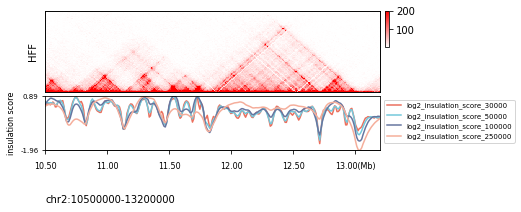

In [15]:
regions = "chr2:10500000-13200000"
HFF = tc.tl.extractCisContact(clr=coolfile, region=regions, extend=150)

ten = tc.tenon(figsize=(6, 1))
ten.add(pos="bottom", height=1.5, hspace=0.05)
ten.add(pos="bottom", height=1, hspace=0.07)

tc.pl.mapC(
    ax=ten.axs(0),
    mat=HFF,
    label="HFF",
    map_type="rec",
    height=150
)

tc.pl.bdgmat_track(ax=ten.axs(1), bed=df, regions=regions, style='line', label='insulation score')
tc.pl.scale_track(ax=ten.axs(1), region=regions, scale_adjust="Mb", tick_pos="bottom", ratio2ax=1, space=0)

#tc.savefig('outfile.pdf')